In [2]:
import numpy as np
import pandas as pd
import pycountry # handles country codes
import country_converter as coco # handles messy country codes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import rc
import pandas.plotting as pdp
import matplotlib.cm as cm
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
df = pd.read_csv('final_dataset.csv')
df

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_underweight,BMI_obesity,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension
0,Afghanistan,Afghanistan,AFG,2000,0,0,0,0,0,True,...,0.215176,0.037869,0.002605,159.842420,0.124577,0.227280,3.129567,1.128193,0.285826,0.360907
1,Afghanistan,Afghanistan,AFG,2004,0,0,0,0,0,True,...,0.179564,0.053626,0.003623,160.101298,0.139517,0.230020,3.140379,1.120109,0.294444,0.367908
2,Afghanistan,Afghanistan,AFG,2008,0,0,1,1,1,True,...,0.148625,0.072227,0.004871,160.345587,0.156097,0.231910,3.139214,1.110600,0.299683,0.375714
3,Afghanistan,Afghanistan,AFG,2012,0,0,1,1,1,True,...,0.119533,0.095673,0.006511,160.547954,0.175056,0.233189,3.127356,1.098825,0.302909,0.383675
4,Algeria,Algeria,DZA,2000,1,1,3,5,5,True,...,0.074711,0.131282,0.006170,164.568663,0.120538,0.384386,3.656587,1.040695,0.303167,0.375078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Vietnam,Vietnam,VNM,2012,0,0,0,0,0,True,...,0.205790,0.007485,0.000263,160.226437,0.053830,0.308850,3.282843,1.100474,0.230051,0.287047
420,Zimbabwe,Zimbabwe,ZWE,2000,0,0,0,0,0,True,...,0.108578,0.064462,0.004432,164.167920,0.097955,0.193180,2.811148,1.281791,0.295197,0.393215
421,Zimbabwe,Zimbabwe,ZWE,2004,1,1,1,3,3,True,...,0.101842,0.072780,0.005343,164.048476,0.107090,0.198996,2.841984,1.288866,0.291489,0.407746
422,Zimbabwe,Zimbabwe,ZWE,2008,1,3,0,4,4,True,...,0.094166,0.082211,0.006385,164.040913,0.110433,0.204597,2.856043,1.290640,0.287677,0.421400


In [4]:
missing_counts = df.isnull().sum()
print(missing_counts)

country                              0
updated_country                      0
Country Code (ISO 3166-1 alpha-3)    0
Year                                 0
gold                                 0
silver                               0
bronze                               0
total                                0
medal_sum                            0
check                                0
GDP                                  0
HDI                                  0
LE                                   0
EYS                                  0
MYS                                  0
GNIPC                                0
MMR                                  0
PHDI                                 0
CO2_PROD                             0
BMI_underweight                      4
BMI_obesity                          4
BMI_morbid_obesity                   4
Mean_Height                          4
Diabetes_in_18+                      4
Diabetes_treated_in_30+              4
non-HDL_cholesterol      

In [5]:
# Filter and print rows that contain any missing values
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_underweight,BMI_obesity,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension
164,Hong Kong,Hong Kong,HKG,2000,0,0,0,0,0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Hong Kong,Hong Kong,HKG,2004,0,2,0,2,2,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Hong Kong,Hong Kong,HKG,2008,0,0,0,0,0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Hong Kong,Hong Kong,HKG,2012,0,0,1,1,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(how='any', inplace=True)
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_underweight,BMI_obesity,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension


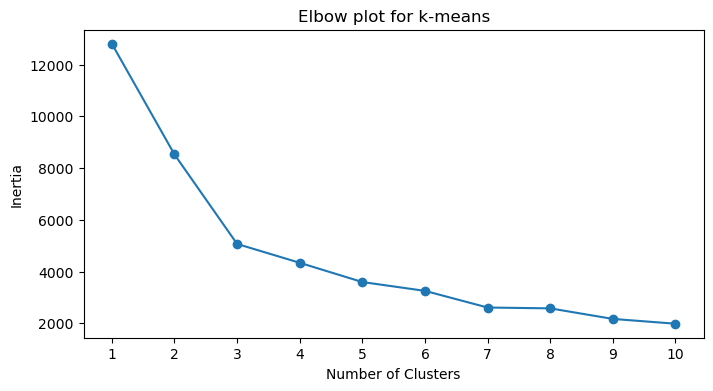

In [7]:
# selecting relevent features -- (selected all for now)
features = [
    "GDP", "HDI", "LE", "EYS", "MYS", "GNIPC", "MMR", "PHDI", 
    "CO2_PROD", "BMI_underweight", "BMI_obesity", "BMI_morbid_obesity", 
    "Mean_Height", "Diabetes_in_18+", "Diabetes_treated_in_30+", 
    "non-HDL_cholesterol", "HDL_cholesterol", "Raised_blood_pressure", "Hypertension"
]
X = df[features]

# SCALING --- use 0-1 scaler!!!

# scaling

#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)




# ELBOW METHOD

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow plot for k-means')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.show()

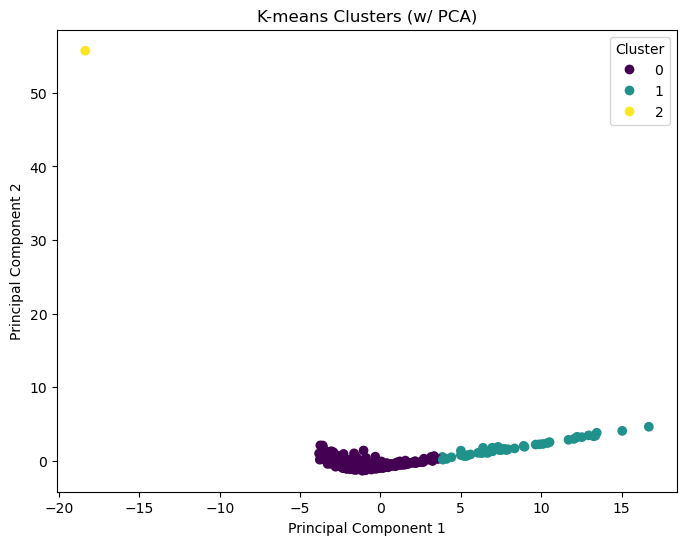

In [8]:
# K-means clustering with 3 clusters
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans_final.fit_predict(X_scaled)

# PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('K-means Clusters (w/ PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


For n_clusters = 2, the average silhouette score is : 0.557


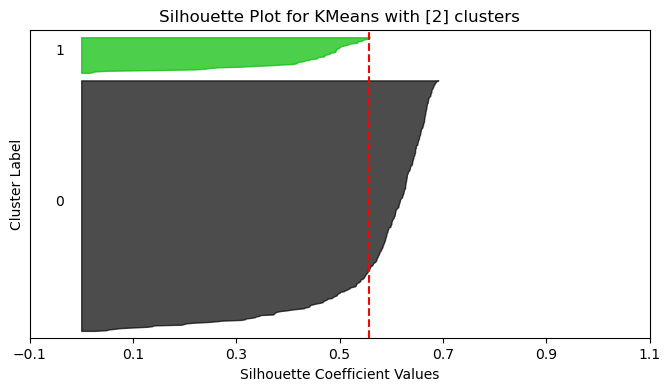

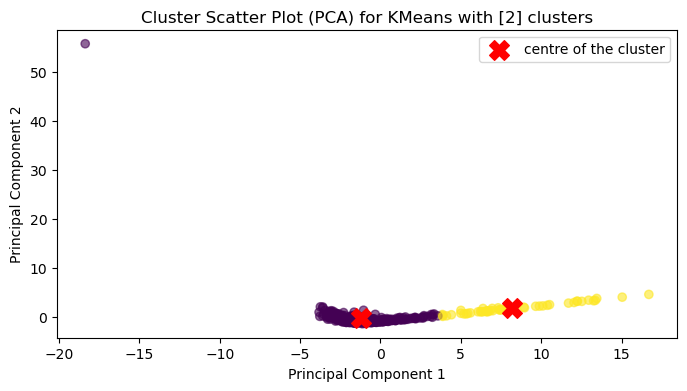

For n_clusters = 3, the average silhouette score is : 0.568


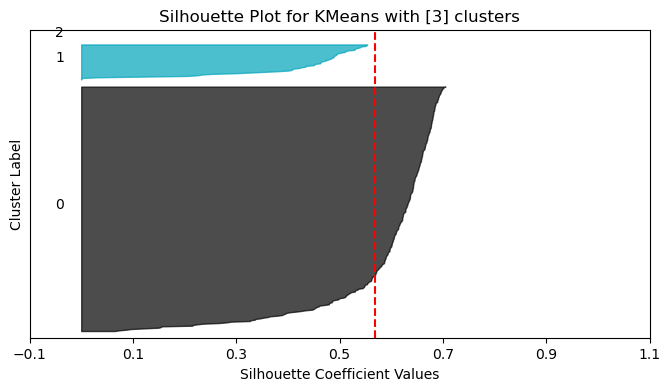

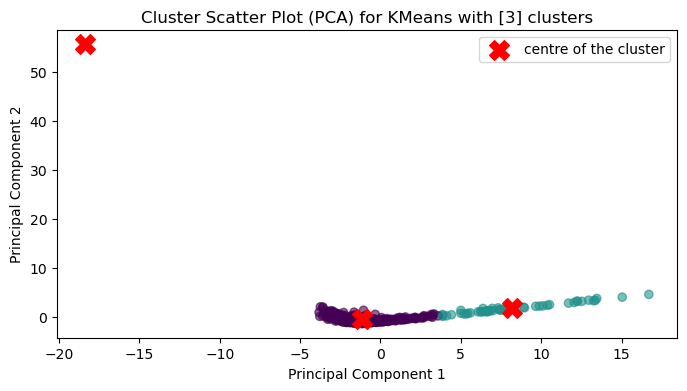

For n_clusters = 4, the average silhouette score is : 0.475


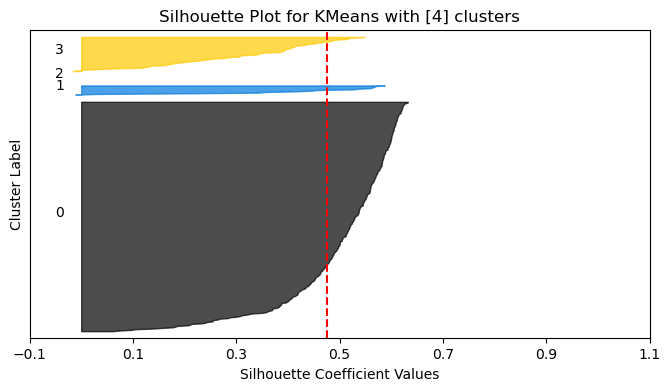

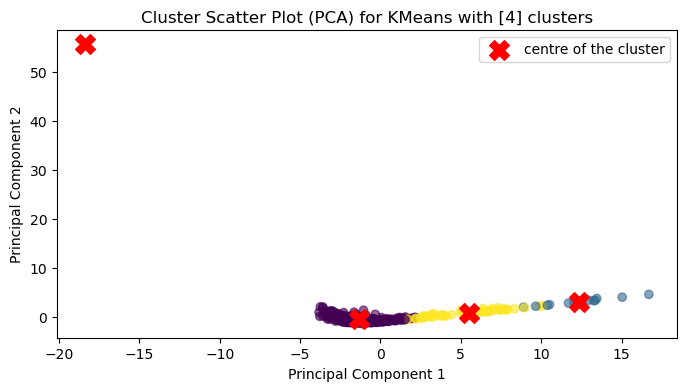

For n_clusters = 5, the average silhouette score is : 0.253


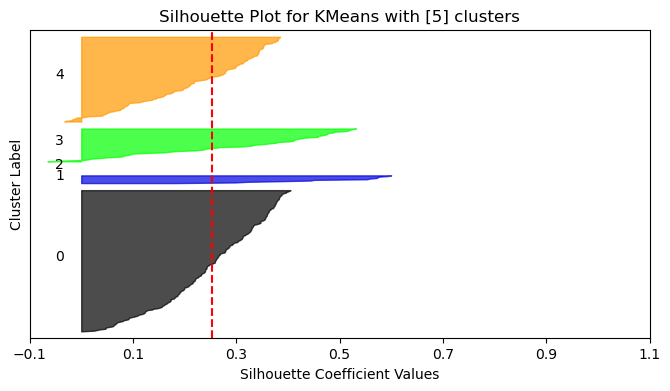

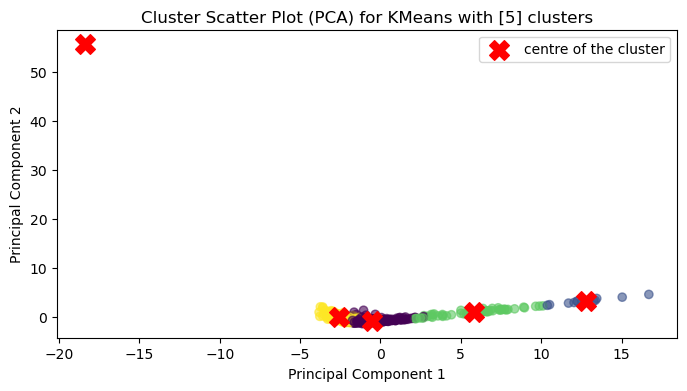

In [9]:
# Step 5: Perform clustering and evaluation for cluster counts from 2 to 5
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Run KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Compute the average silhouette score and silhouette values for each sample
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg:.3f}")
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    # ------------------------------
    # Create the silhouette plot
    # ------------------------------
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 4)
    
    # Set limits for silhouette coefficient values
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plot with cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10  # gap between clusters
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_title(f"Silhouette Plot for KMeans with [{n_clusters}] clusters")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Cluster Label")
    ax1.set_yticks([])  # clear the yaxis labels/ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    
    plt.show()
    
    # ------------------------------
    # Create the cluster scatter plot using PCA
    # ------------------------------
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Get cluster centers and project them onto PCA space
    centers = kmeans.cluster_centers_
    centers_pca = pca.transform(centers)
    
    plt.figure(figsize=(8, 4))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='centre of the cluster')
    plt.title(f"Cluster Scatter Plot (PCA) for KMeans with [{n_clusters}] clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()


In [10]:
df

,country,updated_country,Country Code (ISO 3166-1 alpha-3),Year,gold,silver,bronze,total,medal_sum,check,...,BMI_obesity,BMI_morbid_obesity,Mean_Height,Diabetes_in_18+,Diabetes_treated_in_30+,non-HDL_cholesterol,HDL_cholesterol,Raised_blood_pressure,Hypertension,cluster
0,Afghanistan,Afghanistan,AFG,2000,0,0,0,0,0,True,...,0.037869,0.002605,159.842420,0.124577,0.227280,3.129567,1.128193,0.285826,0.360907,1
1,Afghanistan,Afghanistan,AFG,2004,0,0,0,0,0,True,...,0.053626,0.003623,160.101298,0.139517,0.230020,3.140379,1.120109,0.294444,0.367908,1
2,Afghanistan,Afghanistan,AFG,2008,0,0,1,1,1,True,...,0.072227,0.004871,160.345587,0.156097,0.231910,3.139214,1.110600,0.299683,0.375714,1
3,Afghanistan,Afghanistan,AFG,2012,0,0,1,1,1,True,...,0.095673,0.006511,160.547954,0.175056,0.233189,3.127356,1.098825,0.302909,0.383675,1
4,Algeria,Algeria,DZA,2000,1,1,3,5,5,True,...,0.131282,0.006170,164.568663,0.120538,0.384386,3.656587,1.040695,0.303167,0.375078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Vietnam,Vietnam,VNM,2012,0,0,0,0,0,True,...,0.007485,0.000263,160.226437,0.053830,0.308850,3.282843,1.100474,0.230051,0.287047,0
420,Zimbabwe,Zimbabwe,ZWE,2000,0,0,0,0,0,True,...,0.064462,0.004432,164.167920,0.097955,0.193180,2.811148,1.281791,0.295197,0.393215,1
421,Zimbabwe,Zimbabwe,ZWE,2004,1,1,1,3,3,True,...,0.072780,0.005343,164.048476,0.107090,0.198996,2.841984,1.288866,0.291489,0.407746,1
422,Zimbabwe,Zimbabwe,ZWE,2008,1,3,0,4,4,True,...,0.082211,0.006385,164.040913,0.110433,0.204597,2.856043,1.290640,0.287677,0.421400,1


In [11]:
df.to_csv('final_dataset_clusters.csv', index=False)

In [12]:
print(df['cluster'].unique())

[1 0 2]


In [13]:
print(df.head())


       country updated_country Country Code (ISO 3166-1 alpha-3)  Year  gold  \
0  Afghanistan     Afghanistan                               AFG  2000     0   
1  Afghanistan     Afghanistan                               AFG  2004     0   
2  Afghanistan     Afghanistan                               AFG  2008     0   
3  Afghanistan     Afghanistan                               AFG  2012     0   
4      Algeria         Algeria                               DZA  2000     1   

   silver  bronze  total  medal_sum  check  ...  BMI_obesity  \
0       0       0      0          0   True  ...     0.037869   
1       0       0      0          0   True  ...     0.053626   
2       0       1      1          1   True  ...     0.072227   
3       0       1      1          1   True  ...     0.095673   
4       1       3      5          5   True  ...     0.131282   

   BMI_morbid_obesity  Mean_Height  Diabetes_in_18+  Diabetes_treated_in_30+  \
0            0.002605   159.842420         0.124577   

In [14]:
print(df['cluster'].value_counts())


cluster
0    366
1     53
2      1
Name: count, dtype: int64


In [15]:
df.to_csv('final_dataset_clusters_robust_scaler.csv', index=False)